# StockX Data Contest 2019 
Kayleigh James, jamesmk@umich.edu
## Import Data and Clean


In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from pytrends.request import TrendReq

plt.style.use('seaborn-darkgrid')
df = pd.read_excel('StockX-Data-Contest-2019-3.xlsx',error_bad_lines=False) 
df.head(10)

,Order Date,Brand,Sneaker Name,Sale Price,Retail Price,Release Date,Shoe Size,Buyer Region
0,2017-09-01,Yeezy,Adidas-Yeezy-Boost-350-Low-V2-Beluga,1097.0,220,2016-09-24,11.0,California
1,2017-09-01,Yeezy,Adidas-Yeezy-Boost-350-V2-Core-Black-Copper,685.0,220,2016-11-23,11.0,California
2,2017-09-01,Yeezy,Adidas-Yeezy-Boost-350-V2-Core-Black-Green,690.0,220,2016-11-23,11.0,California
3,2017-09-01,Yeezy,Adidas-Yeezy-Boost-350-V2-Core-Black-Red,1075.0,220,2016-11-23,11.5,Kentucky
4,2017-09-01,Yeezy,Adidas-Yeezy-Boost-350-V2-Core-Black-Red-2017,828.0,220,2017-02-11,11.0,Rhode Island
5,2017-09-01,Yeezy,Adidas-Yeezy-Boost-350-V2-Core-Black-Red-2017,798.0,220,2017-02-11,8.5,Michigan
6,2017-09-01,Yeezy,Adidas-Yeezy-Boost-350-V2-Core-Black-White,784.0,220,2016-12-17,11.0,California
7,2017-09-01,Yeezy,Adidas-Yeezy-Boost-350-V2-Cream-White,460.0,220,2017-04-29,10.0,New York
8,2017-09-01,Yeezy,Adidas-Yeezy-Boost-350-V2-Cream-White,465.0,220,2017-04-29,11.0,Kansas
9,2017-09-01,Yeezy,Adidas-Yeezy-Boost-350-V2-Cream-White,465.0,220,2017-04-29,11.0,Florida


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99956 entries, 0 to 99955
Data columns (total 8 columns):
Order Date      99956 non-null datetime64[ns]
Brand           99956 non-null object
Sneaker Name    99956 non-null object
Sale Price      99956 non-null float64
Retail Price    99956 non-null int64
Release Date    99956 non-null datetime64[ns]
Shoe Size       99956 non-null float64
Buyer Region    99956 non-null object
dtypes: datetime64[ns](2), float64(2), int64(1), object(3)
memory usage: 6.1+ MB


Need to convert the object types into categorical types.

In [4]:
df['Brand'] = pd.Categorical(df['Brand'])
df['Sneaker Name'] = pd.Categorical(df['Sneaker Name'])
df['Buyer Region'] = pd.Categorical(df['Buyer Region'])
df['Order Date'] = pd.to_datetime(df['Order Date'], format='%m/%d/%Y %I:%M:%S %p')
df.index = pd.DatetimeIndex(df['Order Date']) #make date the index of the data
df.info() #check to make sure columns are all the correct data types

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 99956 entries, 2017-09-01 to 2019-02-13
Data columns (total 8 columns):
Order Date      99956 non-null datetime64[ns]
Brand           99956 non-null category
Sneaker Name    99956 non-null category
Sale Price      99956 non-null float64
Retail Price    99956 non-null int64
Release Date    99956 non-null datetime64[ns]
Shoe Size       99956 non-null float64
Buyer Region    99956 non-null category
dtypes: category(3), datetime64[ns](2), float64(2), int64(1)
memory usage: 4.9 MB


## Exploratory Data Analysis

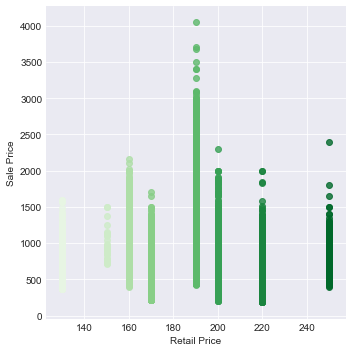

In [5]:
sns.lmplot( x= 'Retail Price', y= "Sale Price", data=df, fit_reg=False, hue='Retail Price', legend=False, palette="Greens")

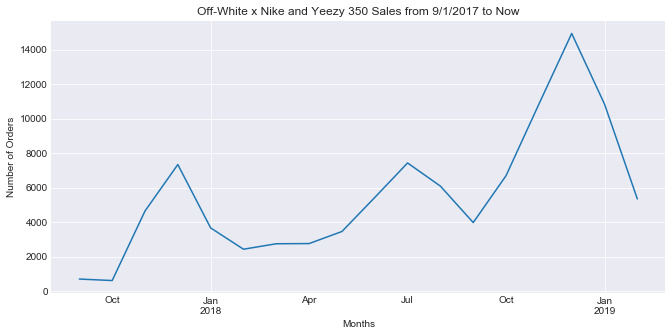

In [6]:
plt.figure(figsize=(11,5))
df.resample('M').size().plot(legend=False)
plt.title('Off-White x Nike and Yeezy 350 Sales from 9/1/2017 to Now')
plt.xlabel('Months')
plt.ylabel('Number of Orders')
plt.show()

Note: Each year around December there is a large spark.  Is it due to Christmas or due to a new release?

Now, plot each feature to see if we notice anything interesting going on.

AttributeError: 'silent_list' object has no attribute 'date'

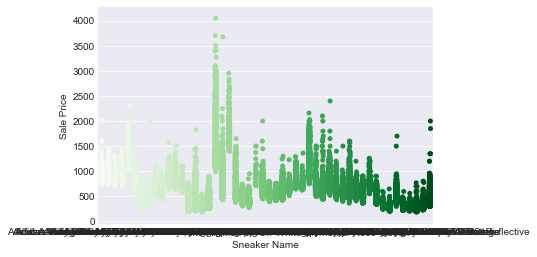

In [31]:
g = sns.stripplot(x="Sneaker Name", y="Sale Price", data=df, palette="Greens")
g.set_xticklabels(g.get_xticklabels().date, rotation=30)

AttributeError: 'AxesSubplot' object has no attribute 'autofmt_xdate'

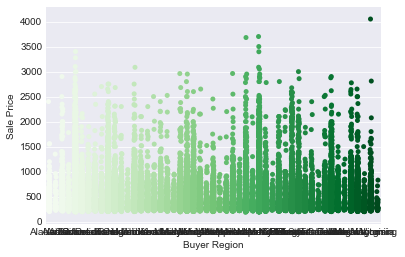

In [61]:
g = sns.stripplot(x="Buyer Region", y="Sale Price", data=df, palette="Greens")
#g.set_xticklabels(g.get_xticklabels(), rotation=30)


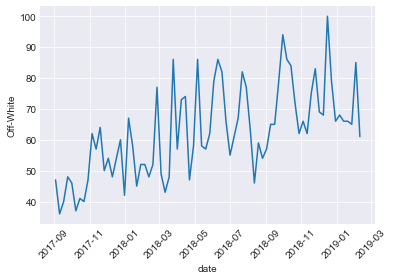

In [64]:
pytrend = TrendReq()
pytrend.build_payload(kw_list=['Off-White'], timeframe='2017-09-01 2019-02-18')
interest_over_time_df = pytrend.interest_over_time()
interest_over_time_df.reset_index(inplace=True)
#interest_over_time_df['date'] = pd.to_datetime(df['date'], format='%m/%d/%Y %I:%M:%S %p')
g2 = sns.lineplot(x=interest_over_time_df['date'], y="Off-White", data=interest_over_time_df, palette="Greens",hue='Retail Price')
for item in g2.get_xticklabels():
    item.set_rotation(45)